In [1]:
import os
path = os.path.abspath(os.getcwd())

In [2]:
%run -i common_functions

# I/ Data Formatting


In [3]:
# FILES
data_files = [
    'moduntu_HP_desktop_trace_jiffies_23.10.15_1h'
]

file = data_files[0]

## A. Text to CSV

In [4]:
def txtdmp_to_csv(filename):
    with open("data/" + filename + ".txt", "r") as textfile:
        textdump = textfile.read().splitlines()
        
    csvfile = open("csv/" + filename + ".csv", "w")
    csvfile.write(','.join(["count", "timestamp", "regs", "irq", "swab", "jiffies", "idle"]))
    csvfile.write('\n')

    count = 0
    for line in textdump: 
        splitline = line.replace('@','').replace(',','').split(' ')
        values, start, idle = [], False, False

        for i in splitline: 
            # extract add_interrupt_randomness values
            if i == "add_interrupt_randomness:":
                start = True
                count += 1
                values.append(str(count))
            elif start and i != "a":
                values.append(i)

            # Check for idle
            if i == "<idle>-0":
                idle = True

        if values != []:
            values.append(str(idle))
            csvfile.write(','.join(values))
            csvfile.write('\n')

    csvfile.close()

## B. Data Import

In [5]:
# Show stats for 'idle' column.
data_path = path + "\\csv\\" + file + ".csv"
data = pd.read_csv(data_path)

print(file)
for col in ["idle"]:
    get_stats(data, col)

moduntu_HP_desktop_trace_jiffies_23.10.15_1h
    Stats for idle :
        True		 364229		 91%
        False		 35451		 9%



In [6]:
data.head(20)

,count,timestamp,regs,irq,swab,jiffies,idle
0,1,51036824464,18446744072313314992,0,0,4294892297,True
1,2,51045994495,18446744072313314992,0,0,4294892298,True
2,3,51055176440,18446744072313314992,0,0,4294892299,True
3,4,51064359489,18446744072313314992,0,0,4294892300,True
4,5,51073541871,18446744072313314992,0,0,4294892301,True
5,6,51082732073,18446744072288989251,0,0,4294892302,True
6,7,51091907877,18446744072288989251,0,0,4294892303,True
7,8,51101090466,18446744072281703387,0,0,4294892304,True
8,9,51110271813,18446744072296703746,0,0,4294892305,True
9,10,51119454333,18446744072281703387,0,0,4294892306,True


# II/ Analysis of the IRQ

## A. Undifferenced Variable

### 1) Direct Plotting

Plot of moduntu_HP_desktop_trace_jiffies_23.10.15_1h :
	 differencing order: 0
	 selection: []
	 crop values: 0, 0
	 # of elements: 399680
	 log = False


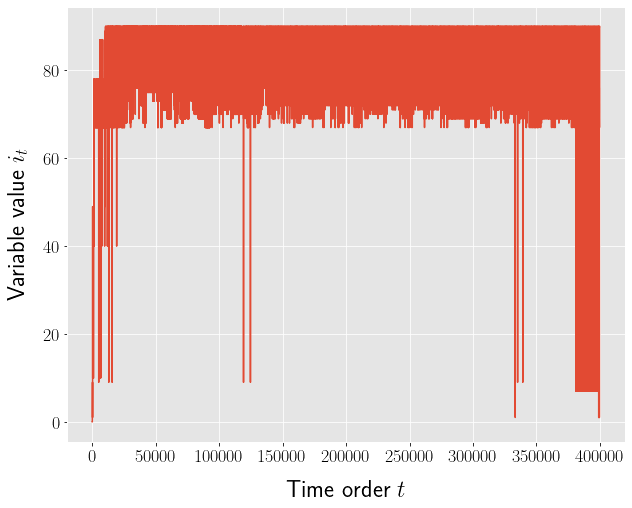

In [7]:
data_plot(file, 'irq', log=False, ylabel=r'Variable value $i_t$')

Plot of moduntu_HP_desktop_trace_jiffies_23.10.15_1h :
	 differencing order: 0
	 selection: [('idle', True)]
	 crop values: 109268, 36422
	 # of elements: 218539
	 log = True


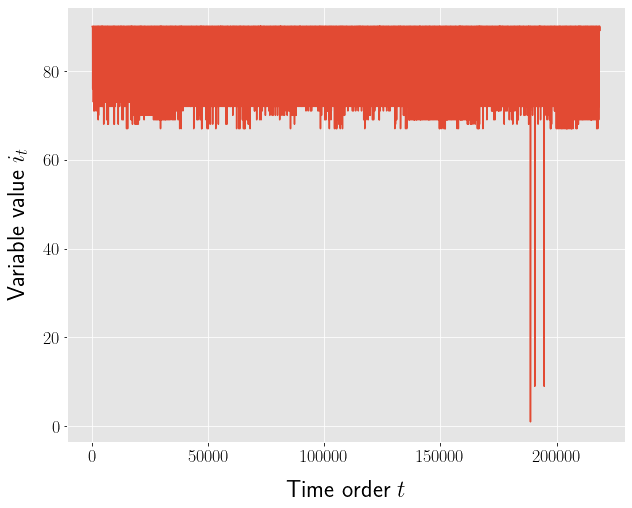

In [8]:
data_plot(file, 'irq', selection = [('idle', True)], crop = (0.3, 0.1), log = True, ylabel=r'Variable value $i_t$')

### 2) Histogram

Histogram of moduntu_HP_desktop_trace_jiffies_23.10.15_1h :
	 differencing order: 0
	 selection: []
	 crop values: 0, 0
	 # of elements: 399680
	 # of bins: 632
	 log = False


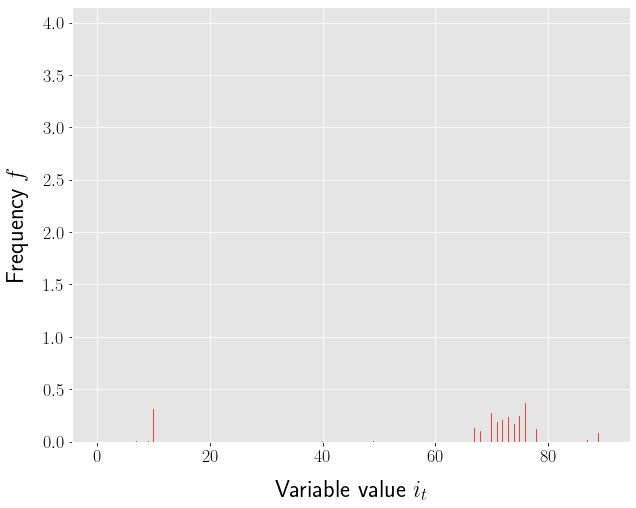

In [9]:
data_hist(file, 'irq', log=False, xlabel=r'Variable value $i_t$')

Histogram of moduntu_HP_desktop_trace_jiffies_23.10.15_1h :
	 differencing order: 0
	 selection: [('idle', True)]
	 crop values: 109268, 36422
	 # of elements: 218539
	 # of bins: 467
	 log = True


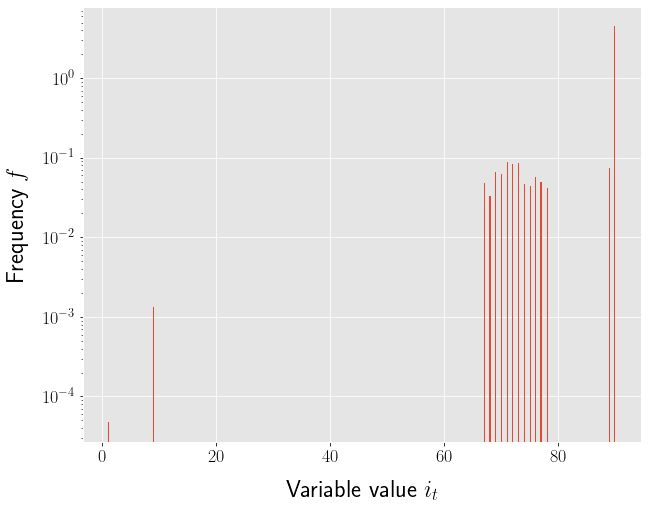

In [10]:
data_hist(file, 'irq', selection = [('idle', True)], crop = (0.3, 0.1), log = True,
          xlabel=r'Variable value $i_t$')

### 3) Correlogram

Correlogram of moduntu_HP_desktop_trace_jiffies_23.10.15_1h :
	 differencing order: 0
	 selection: []
	 crop values: 0, 0
	 # of elements: 399680


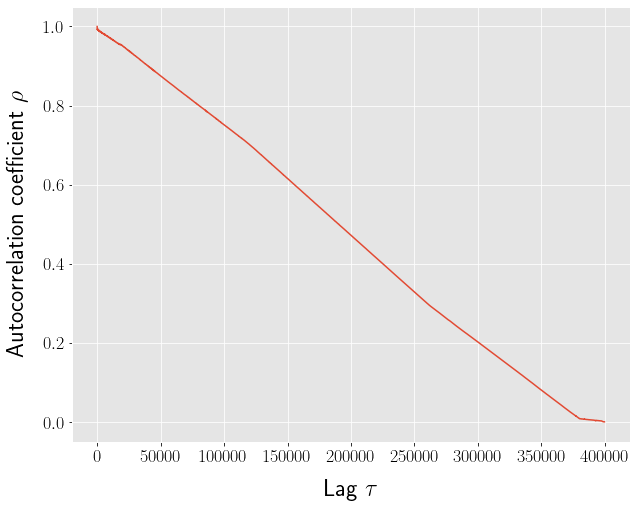

In [11]:
data_autocorr(file, 'irq', mode='fft', diff_order=0)

Correlogram of moduntu_HP_desktop_trace_jiffies_23.10.15_1h :
	 differencing order: 0
	 selection: []
	 crop values: 0, 0
	 # of elements: 399680


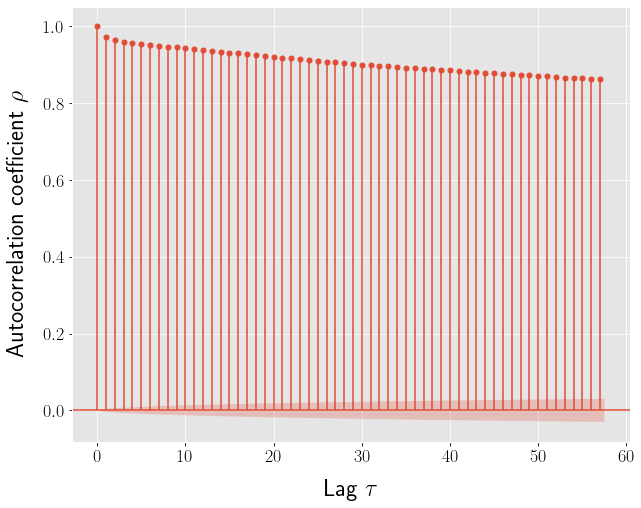

In [12]:
data_autocorr(file, 'irq', mode='acf', diff_order=0)

## B. First-Order Differencing

### 1) Histogram

Histogram of moduntu_HP_desktop_trace_jiffies_23.10.15_1h :
	 differencing order: 1
	 selection: []
	 crop values: 0, 0
	 # of elements: 399680
	 # of bins: 632
	 log = True


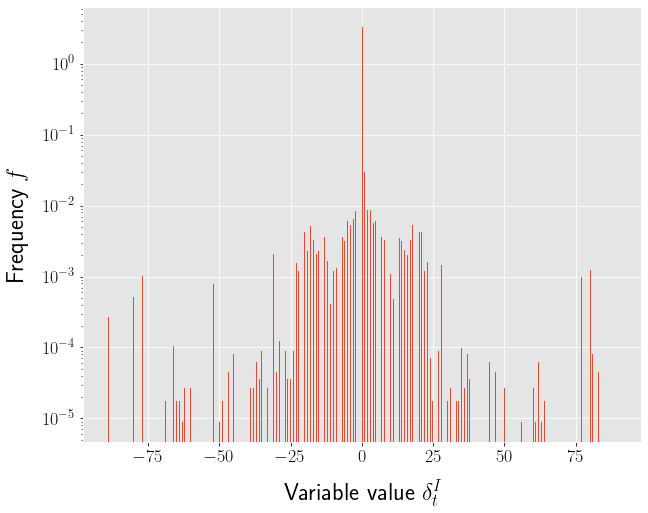

In [13]:
data_hist(file, 'irq', diff_order=1, log=True, xlabel=r'Variable value $\delta^I_t$')

Histogram of moduntu_HP_desktop_trace_jiffies_23.10.15_1h :
	 differencing order: 1
	 selection: [('idle', True)]
	 crop values: 72845, 36422
	 # of elements: 254962
	 # of bins: 504
	 log = True


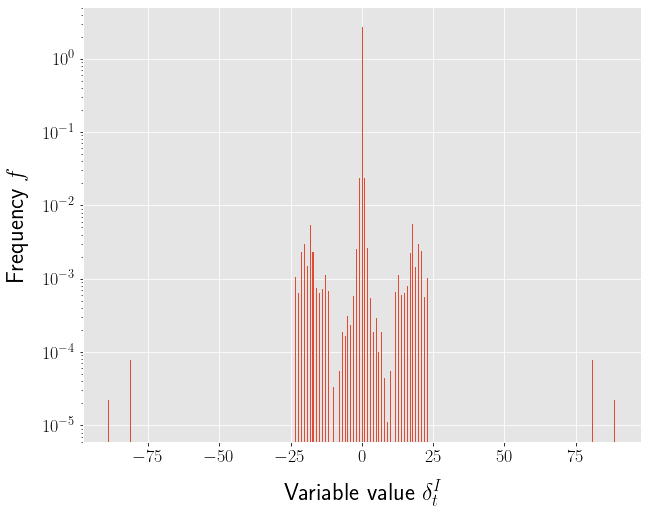

In [14]:
data_hist(file, 'irq', diff_order=1, selection=[('idle', True)], crop=(0.2, 0.1), log=True, 
         xlabel=r'Variable value $\delta^I_t$')

### 2) Correlogram

Correlogram of moduntu_HP_desktop_trace_jiffies_23.10.15_1h :
	 differencing order: 1
	 selection: []
	 crop values: 0, 0
	 # of elements: 399680


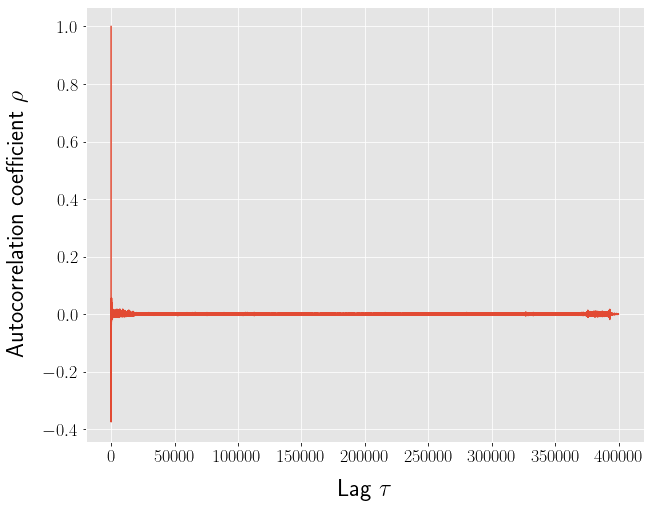

In [15]:
data_autocorr(file, 'irq', mode='fft', diff_order=1)

Correlogram of moduntu_HP_desktop_trace_jiffies_23.10.15_1h :
	 differencing order: 1
	 selection: []
	 crop values: 0, 0
	 # of elements: 399680


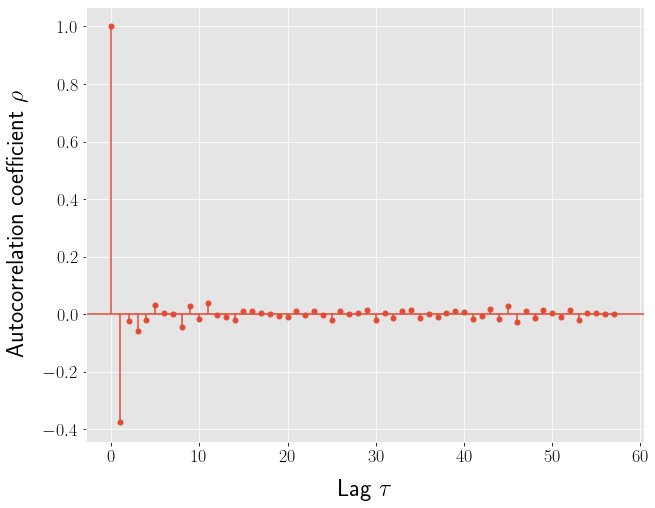

In [16]:
data_autocorr(file, 'irq', mode='acf', diff_order=1)

## C. Second-Order Differencing

### 1) Histogram

Histogram of moduntu_HP_desktop_trace_jiffies_23.10.15_1h :
	 differencing order: 2
	 selection: []
	 crop values: 0, 0
	 # of elements: 399680
	 # of bins: 632
	 log = True


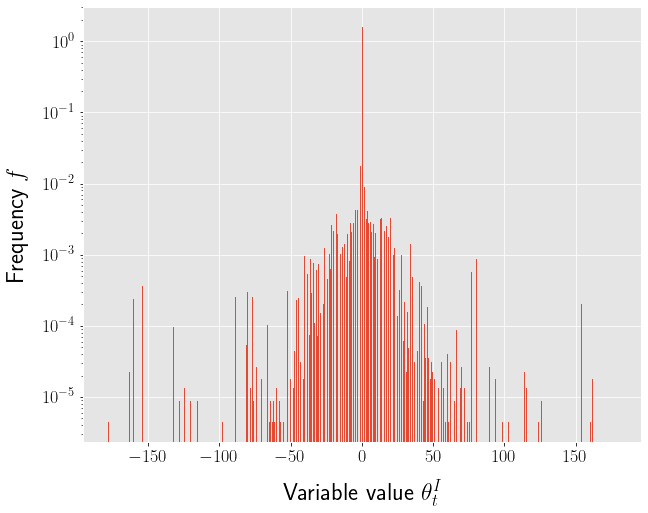

In [17]:
data_hist(file, 'irq', diff_order=2, log = True, xlabel=r'Variable value $\theta^I_t$')

Histogram of moduntu_HP_desktop_trace_jiffies_23.10.15_1h :
	 differencing order: 2
	 selection: [('idle', True)]
	 crop values: 72845, 36422
	 # of elements: 254962
	 # of bins: 504
	 log = True


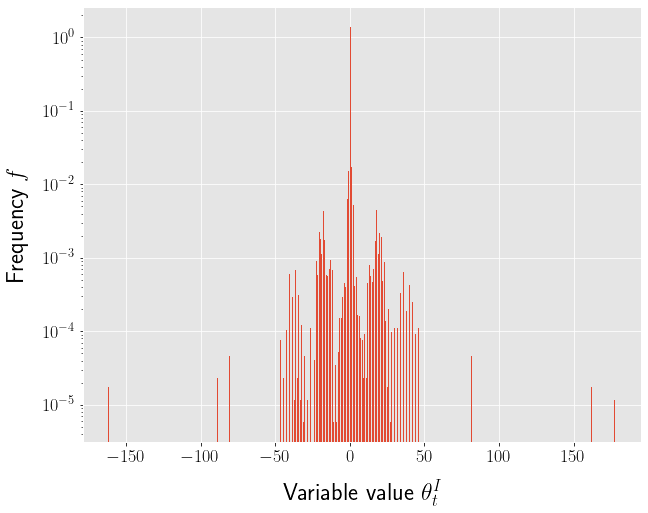

In [18]:
data_hist(file, 'irq', diff_order=2, selection=[('idle', True)], crop=(0.2, 0.1), log=True,
         xlabel=r'Variable value $\theta^I_t$')

### 2) Autocorrelation

Correlogram of moduntu_HP_desktop_trace_jiffies_23.10.15_1h :
	 differencing order: 2
	 selection: []
	 crop values: 0, 0
	 # of elements: 399680


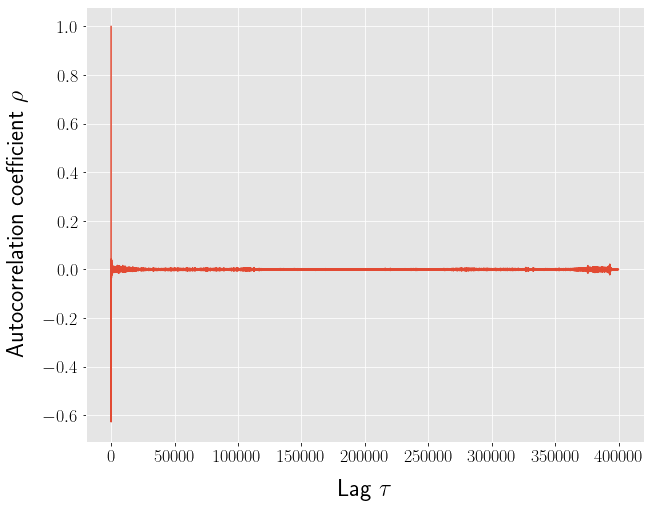

In [19]:
data_autocorr(file, 'irq', mode='fft', diff_order=2)

Correlogram of moduntu_HP_desktop_trace_jiffies_23.10.15_1h :
	 differencing order: 2
	 selection: []
	 crop values: 0, 0
	 # of elements: 399680


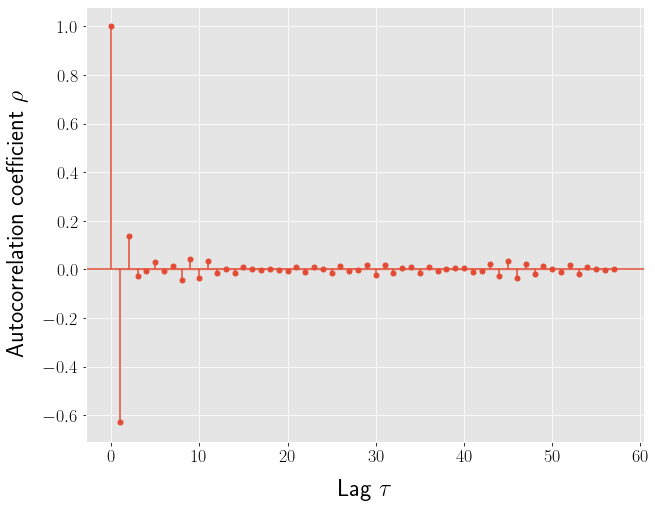

In [20]:
data_autocorr(file, 'irq', mode='acf', diff_order=2)

## D. Model

In [21]:
data_freq(file, 'irq', diff_order=1, selection=[('idle', True)], crop=(0.3, 0.1)).head()

,Unique Value,Count,Ratio,Percentage
0,0,212632,0.972970,97.297050
1,-1,1625,0.007436,0.743574
2,1,1622,0.007422,0.742202
3,18,416,0.001904,0.190355
4,-18,398,0.001821,0.182119


In [22]:
data_freq(file, 'irq', diff_order=2, selection=[('idle', True)], crop=(0.3, 0.1)).head()

,Unique Value,Count,Ratio,Percentage
0,0,208351,0.953381,95.338132
1,1,2268,0.010378,1.037801
2,-1,1970,0.009014,0.901441
3,-18,703,0.003217,0.321682
4,18,667,0.003052,0.305209


In [23]:
conditional_data_freq(file, 'irq', diff_order=2, selection=[('idle', True)], crop=(0.3, 0.1), 
                      output="irq-conditional_freqs")

[[-162.0, [(81, 1.0)]],
 [-89.0, [(0, 0.5), (178, 0.5)]],
 [-81.0, [(0, 0.5), (162, 0.5)]],
 [-46.0, [(23, 1.0)]],
 [-44.0, [(22, 1.0)]],
 [-42.0, [(21, 0.5), (42, 0.5)]],
 [-40.0, [(20, 0.8), (40, 0.2)]],
 [-38.0,
  [(18, 0.09090909090909091),
   (19, 0.7272727272727273),
   (23, 0.09090909090909091),
   (26, 0.09090909090909091)]],
 [-37.0, [(17, 0.5), (40, 0.5)]],
 [-36.0, [(18, 0.41509433962264153), (36, 0.5849056603773585)]],
 [-34.0, [(17, 0.4), (34, 0.6)]],
 [-32.0, [(16, 0.6666666666666666), (34, 0.3333333333333333)]],
 [-31.0, [(13, 1.0)]],
 [-30.0, [(15, 1.0)]],
 [-28.0, [(14, 1.0)]],
 [-26.0, [(13, 1.0)]],
 [-24.0, [(1, 0.2), (12, 0.2), (23, 0.6)]],
 [-23.0,
  [(-23, 0.007874015748031496),
   (-1, 0.007874015748031496),
   (0, 0.47244094488188976),
   (22, 0.007874015748031496),
   (23, 0.36220472440944884),
   (25, 0.007874015748031496),
   (26, 0.007874015748031496),
   (28, 0.007874015748031496),
   (30, 0.007874015748031496),
   (46, 0.11023622047244094)]],
 [-22.0,
  [(